In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

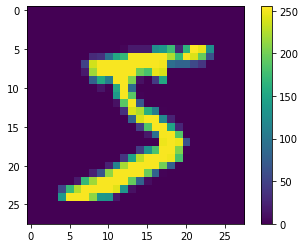

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

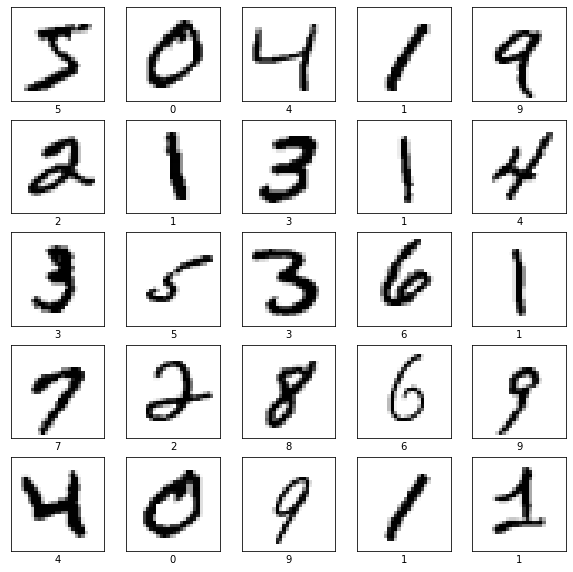

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [10]:
from keras.layers.convolutional import Conv2D

In [11]:
model = keras.Sequential()

In [12]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Обучение

In [16]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(train_images, train_labels,
         batch_size=64,
         epochs=10,
         validation_data=(test_images, test_labels),
         callbacks=[checkpointer])

Epoch 1/10
938/938 [==============================] - 40s 42ms/step - loss: 0.5855 - accuracy: 0.8044 - val_loss: 0.0720 - val_accuracy: 0.9775

Epoch 00001: val_loss improved from inf to 0.07199, saving model to model.weights.best.hdf5
Epoch 2/10
938/938 [==============================] - 40s 42ms/step - loss: 0.1288 - accuracy: 0.9590 - val_loss: 0.0449 - val_accuracy: 0.9857

Epoch 00002: val_loss improved from 0.07199 to 0.04494, saving model to model.weights.best.hdf5
Epoch 3/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0905 - accuracy: 0.9711 - val_loss: 0.0385 - val_accuracy: 0.9876

Epoch 00003: val_loss improved from 0.04494 to 0.03846, saving model to model.weights.best.hdf5
Epoch 4/10
938/938 [==============================] - 39s 42ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0373 - val_accuracy: 0.9876

Epoch 00004: val_loss improved from 0.03846 to 0.03733, saving model to model.weights.best.hdf5
Epoch 5/10
938/938 [====================

In [17]:
model.load_weights('model.weights.best.hdf5')

In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9911999702453613


Визуализация

ValueError: num must be 1 <= num <= 15, not 16

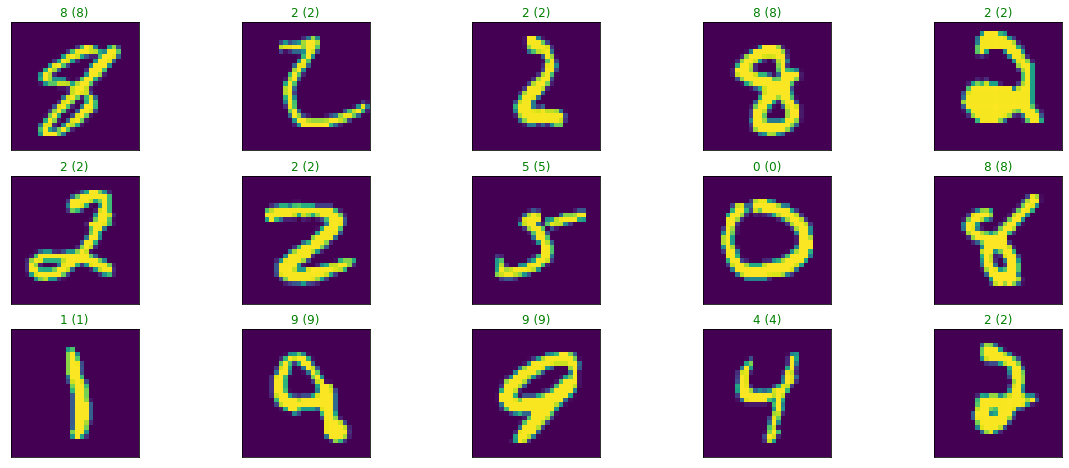

In [20]:
pred = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=30, replace=False)):
    ax = figure.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(pred[index])
    true_index = np.argmax(test_labels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))